# Proyecto Final de Ciencia de Datos en Python

In [95]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## cargamos la data
data_set = np.load('proyecto_data/proyecto_training_data.npy')

## definimos las columnas
columns   = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']

## definimos el set de entrenamiento como un DataFrame, obteniendo el 80% del data set completo
training_set        = pd.DataFrame(data_set[: int(len(data_set) * 0.8)], columns = columns)
                    
## definimos el set de pruebas y validación como un DataFrame, obteniendo el 20% del data set completo
validation_test_set = pd.DataFrame(data_set[int(len(data_set) * 0.8):], columns = columns)

In [67]:
training_set.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [6]:
validation_test_set.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,235000.0,6.0,1236.0,7.0,1935.0,120.0
1,625000.0,10.0,1831.0,10.0,1995.0,118.0
2,171000.0,6.0,1118.0,6.0,1977.0,76.0
3,163000.0,6.0,1261.0,6.0,1958.0,76.0
4,171900.0,7.0,625.0,5.0,2006.0,35.0


In [7]:
len(training_set)

1168

In [8]:
len(validation_test_set)

292

## Análisis exploratorio de datos

In [9]:
## Obtener la media de los datos
media = np.nanmean(training_set, axis=0)
media

array([1.80590277e+05, 6.10102740e+00, 1.15632363e+03, 6.48544521e+00,
       1.97145120e+03, 6.99469854e+01])

In [10]:
## Obtener el valor máximo de los datos
max_data = np.nanmax(training_set, axis = 0)
max_data

array([7.550e+05, 1.000e+01, 3.228e+03, 1.400e+01, 2.010e+03, 3.130e+02])

In [11]:
## obtener el valor mínimo de los datos
min_data = np.nanmin(training_set, axis = 0)
min_data

array([3.490e+04, 1.000e+00, 3.340e+02, 2.000e+00, 1.875e+03, 2.100e+01])

In [12]:
## Obtener el rango (peak to peak) de los datos
peak_to_peak = max_data - min_data
peak_to_peak

array([7.201e+05, 9.000e+00, 2.894e+03, 1.200e+01, 1.350e+02, 2.920e+02])

In [13]:
## Obtener la desviacion estandar de los datos
std_data = np.nanstd(training_set, axis = 0)
std_data

array([7.87819511e+04, 1.37743519e+00, 3.73620332e+02, 1.60845172e+00,
       2.99388821e+01, 2.34659548e+01])

## Histograma para cada variable (seaborn)

In [14]:
## utilización de seaborn

def draw_hist(data):
    """Draw for each variable of the set 
    its respective histogram through seaborn"""
    
    fig, axes = plt.subplots(figsize=(25,25),nrows=3,ncols=2)
    sns.set_theme()
    for i in range(data.shape[1]):
        sns.distplot(data.iloc[:,i], kde=False, bins=15, ax=axes[i//2,i%2])
        sns.set_context("talk")
    plt.show()

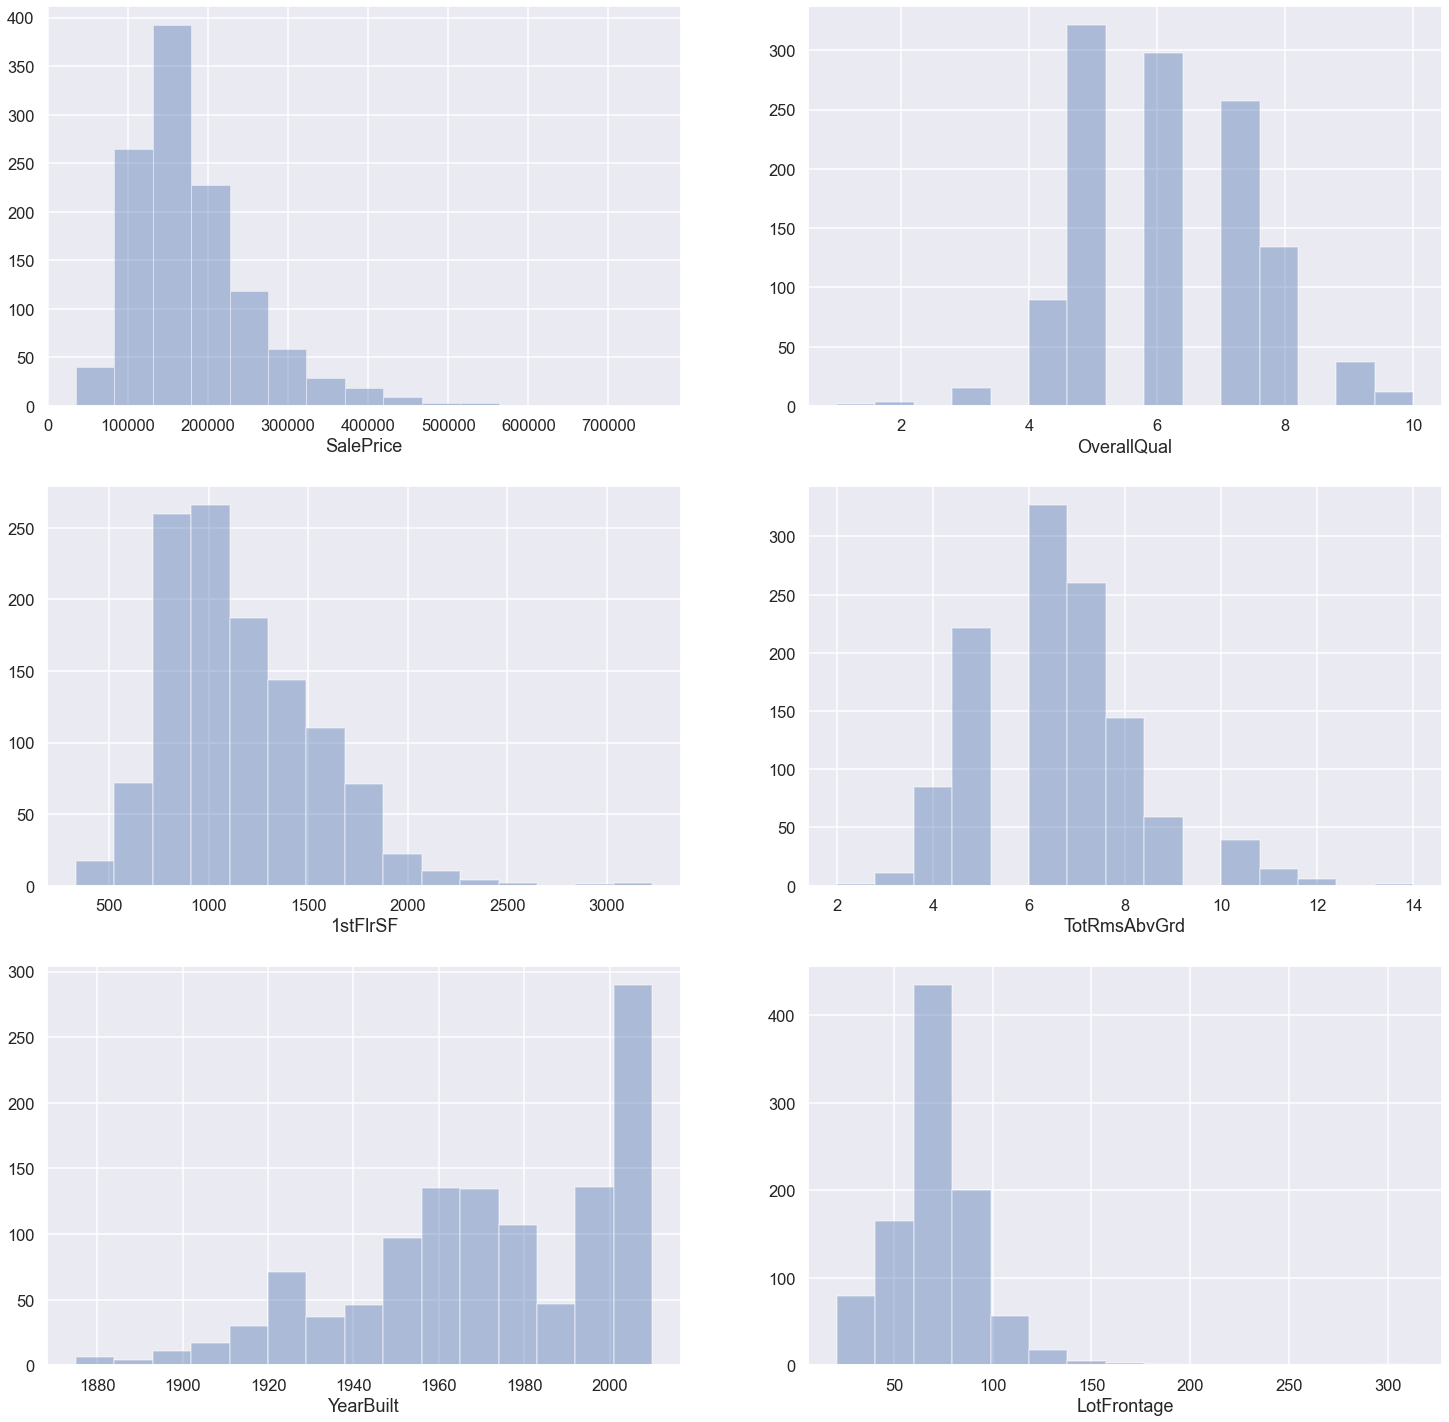

In [16]:
draw_hist(training_set)

## Coeficiente de correlación y gráfica de Dispersión

In [17]:
def get_corr_data(data):
    """Calculate for each independent variable X and Y (SalePrice), 
    the correlation coefficient."""
    return data.corr()

In [18]:
corr = get_corr_data(training_set)
corr.loc[:,'SalePrice']

SalePrice       1.000000
OverallQual     0.793990
1stFlrSF        0.616289
TotRmsAbvGrd    0.564707
YearBuilt       0.534171
LotFrontage     0.363292
Name: SalePrice, dtype: float64

In [19]:
def draw_scatter(data):
    """Plot for each independent variable X and Y (SalePrice), 
    the scatter plot."""
    
    color_arr = np.random.rand(len(data))
    fig, axes = plt.subplots(figsize=(25,25), nrows=3, ncols=2)

    for i in range(data.shape[1] - 1):
        axes[i//2,i%2].scatter(data.iloc[:,i+1], data.iloc[:,0], alpha=0.7, c = color_arr)
        axes[i//2,i%2].set_title(f"Coeficiente de correlación: {corr.loc[:,'SalePrice'][i+1]}")
        axes[i//2,i%2].set_xlabel(data.iloc[:,i+1].name)
        axes[i//2,i%2].set_ylabel(data.iloc[:,0].name)
    plt.tight_layout()
    plt.show()

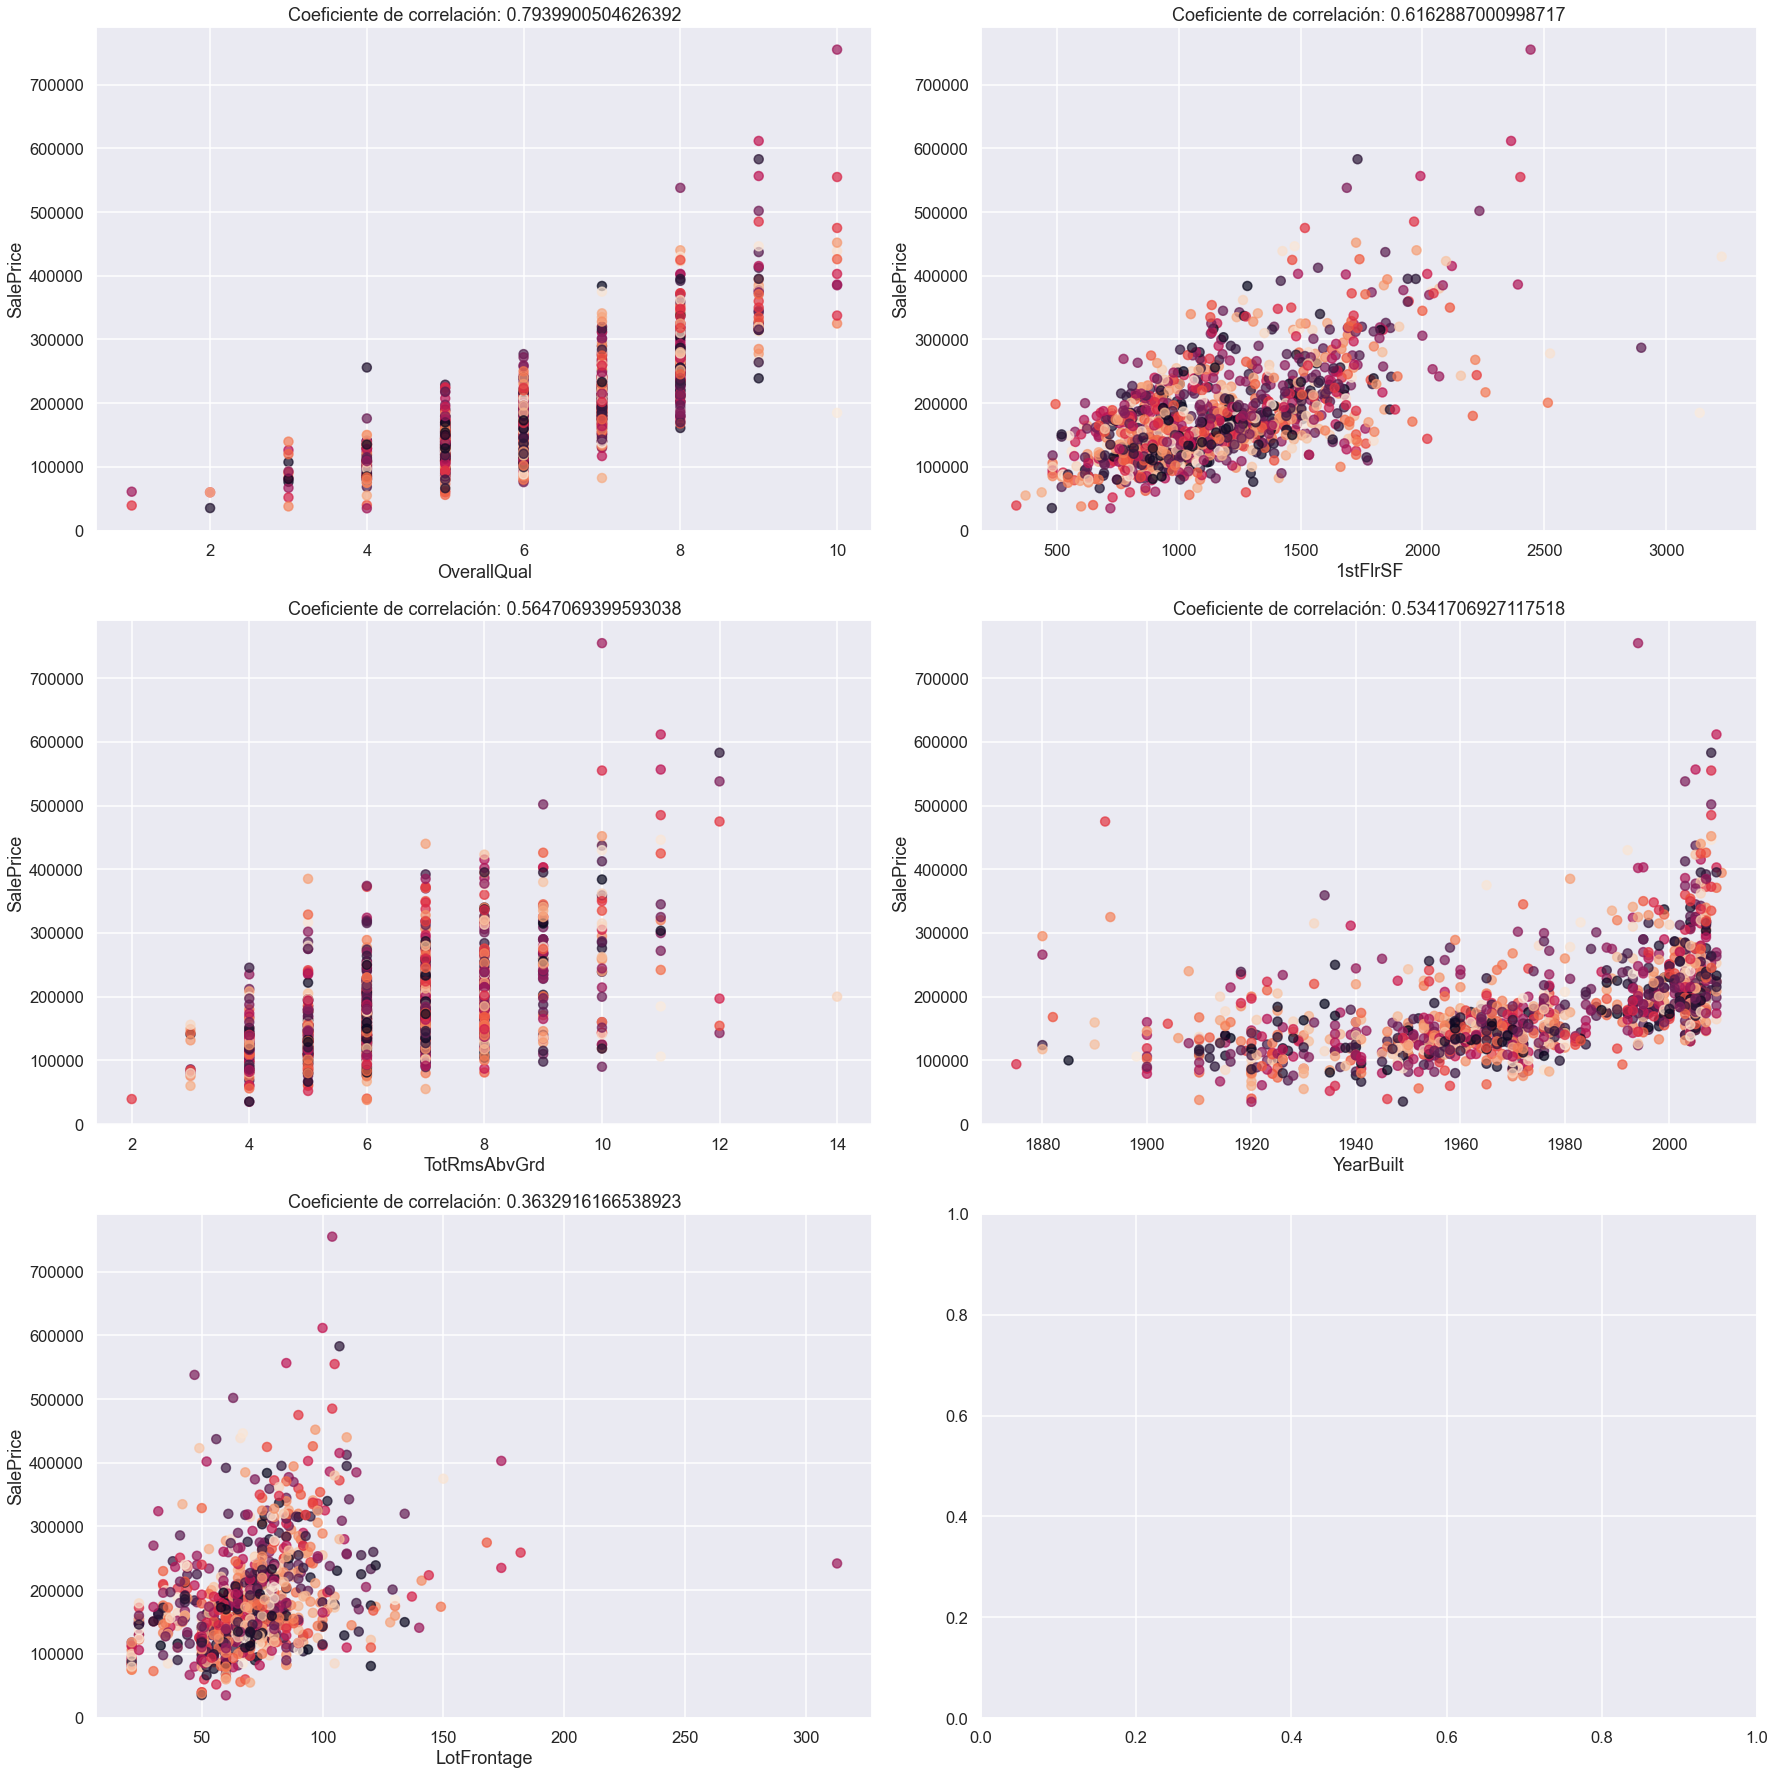

In [20]:
draw_scatter(training_set)

In [21]:
## De acuerdo a la gráfica y el resultado del coeficiente de correlación
## OverallQual como variable independiente X1 y SalePrice  como variable dependiente,
##tiene un coeficiente de correlación muy alto casi cercano al 1
X1 = training_set.loc[:, ['OverallQual']]
X1.head()

,OverallQual
0,7.0
1,6.0
2,7.0
3,7.0
4,8.0


In [22]:
## 1stFlrSF como variable independiente X2 y SalePrice  como variable dependiente,
##tiene un coeficiente de correlación muy alto casi cercano al 1
X2 = training_set.loc[:, ['1stFlrSF']]
X2.head()

,1stFlrSF
0,856.0
1,1262.0
2,920.0
3,961.0
4,1145.0


## Modelo de Entrenamiento

In [149]:
class regresion_lineal:
    """
    Una regresion lineal, tendrá las siguientes funciones para el entrenamiento de los datos.
    Además en el constructor recibirá data de X y Y, además el número de iteraciones para entrenar el modelo,
    el indicador para imprimir el error,
    y el learning_rate
    """
    
    def __init__(self, x, y, epochs, imprimir_error_cada, learning_rate):
        """Constructor que inicializará las variables necesarias para el modelo"""
        self.x1             = np.hstack([x.reshape(-1, 1), np.ones_like(x).reshape(-1, 1)])
        self.x              = x
        self.y              = y
        self.betas          = np.array([[1],[1]])
        self.epochs         = epochs
        self.err_ban        = imprimir_error_cada
        self.learn_rate     = learning_rate
        self.all_errors     = {}
        self.all_betas      = {}
    
    
    def epochs_loop(self):
        """Ciclo que entrenará el modelo"""
        
        n = len(self.x1)
        for i in range(1, self.epochs+1):
            
            # formula vectorizada para cada predicción x1, obteniendo el vector predict_y
            self.predict_y = np.dot(self.x1, self.betas)
            
            # calcular el error usando 'y' y 'predict_y'
            err = (1/(2*n))*((self.y - self.predict_y)**2).sum()
            if i % self.err_ban == 0:
                print(f'No.Iteración: {i}, Error: {err}')
            self.all_errors[i] = err
                
            #cálculo de gradiente del error respecto a las betas
            self.grads = ((1/n) * np.dot((self.predict_y - self.y).reshape(1,-1), self.x1)).reshape(-1,1)
            self.betas = np.dot(np.hstack([self.betas, self.grads]), np.array([[1], [-self.learn_rate]]))
            self.all_betas[i] = self.betas
        
        print (f"\n\n Betas: {self.all_betas} \n\n Errores: {self.all_errors} \n\n")
        self.draw_errtime()
        return self.predict_y
        
    
    def draw_errtime(self):
        """Maneja los errores encontrados y los dibuja con matplotlib"""
        plt.plot(np.arange(1, self.epochs+1) ,self.all_errors.values(), color='r')
        plt.title('Gráfica de Errores en el Tiempo')
        plt.xlabel('X-Epochs')
        plt.ylabel('Error')
        plt.show()
        
    
    def draw_models_in_time(self, iteraciones):
        """Muestra cómo funciona el modelo entrenado con el tiempo"""
        plt.scatter(self.x, self.y, s=10, alpha=0.5)
        for i in range(1, self.epochs+1):
            if i % iteraciones == 0:
                aux_y = np.dot(self.x1, self.all_betas[i])
                if i == self.epochs:
                    plt.plot(self.x, aux_y, c='purple')
                else:
                    plt.plot(self.x, aux_y, alpha=0.2, c='purple')
        plt.title('Comportamiento del Modelo en el Tiempo')
        plt.show()
        
    
    def regresion_sklearn(self):
        """Función que entrenará para cada X seleccionada a través de sklearn"""
        reg              = LinearRegression().fit(self.x, self.y)
        self.skpredict_y = reg.predict(self.x)
        
        print(f"\n\n B0: {reg.intercept_} \n\n B1: {reg.coef_} \n\n")
        
        plt.scatter(self.x, self.y, s=10, alpha=0.5)
        plt.plot(self.x, self.skpredict_y, color='r')
        plt.title('Modelo de Sklearn de entrenamiento')
        plt.show()
        
        return self.skpredict_y
        
        
    def predict_models(self, manual, sk, vector):
        """Calcula la estimación o predicción del modelo manual y de sklearn
        Devuelve una predicción estimada promediando las predicciones de ambos modelos"""
        
        aux_manual         = manual[:,0]
        aux_sk             = sk[:,0]
        vector             = vector + np.nanmean(np.array([aux_manual[0:len(vector),], aux_sk[0:len(vector),]]), axis=0).reshape(-1,1)
        return np.array([aux_manual[0:len(vector),], aux_sk[0:len(vector),], vector[:,0]])
    
    
    def data_test(self, x, y):
        """
        Maneja los datos de prueba para cada uno de los modelos (manual y sklearn),
        además, grafica el error de cada modelo y compara.
        """
        
        manual_predict_y  = self._manual_regresion(x, y)
        sklearn_predict_y = self._sklearn_regresion(x, y)
        
        rmse_manual  = mean_squared_error(y, manual_predict_y)
        rmse_skleanr = mean_squared_error(y, sklearn_predict_y)
        
        self._draw_erros(rmse_manual, rmse_skleanr)
        
        
    def _manual_regresion(self, x, y):
        """Obtiene los datos predictivos a través del modelo manual"""
        
        x1        = np.hstack([x.reshape(-1, 1), np.ones_like(x).reshape(-1, 1)])
        predict_y = np.dot(x1, self.betas)
        return predict_y
    
    
    def _sklearn_regresion(self, x, y):
        """Obtiene los datos predictivos a través del modelo de sklearn"""
        reg         = LinearRegression().fit(x, y)
        skpredict_y = reg.predict(x)
        return skpredict_y
    
    def _draw_erros(self, error_m, error_sk):
        """
        Gráfica ambos errores para identificar cuál es el menor, 
        se realiza a través de una gráfica de barra.
        """
        print(error_m,error_sk )
        xaxis =np.arange(1)
        plt.bar(['Manual'], error_m, width=0.45, edgecolor='k', color='g', label='Manual')
        plt.bar(['Sklearn'], error_sk, width=0.45, edgecolor='k', color='y', label='Sklearn')
        plt.legend(loc=1)
        plt.title('Comparación de Errores')
        plt.show()
        
    

In [150]:
modelo = regresion_lineal(X1.to_numpy(), training_set.loc[:, ['SalePrice']].to_numpy(), 150, 10, 0.003)

No.Iteración: 10, Error: 3190342034.9990106
No.Iteración: 20, Error: 1532069064.2338402
No.Iteración: 30, Error: 1403437967.2925818
No.Iteración: 40, Error: 1392866771.5040224
No.Iteración: 50, Error: 1391409288.2643433
No.Iteración: 60, Error: 1390657023.4262664
No.Iteración: 70, Error: 1389961002.5393662
No.Iteración: 80, Error: 1389271132.4744003
No.Iteración: 90, Error: 1388583541.8987632
No.Iteración: 100, Error: 1387897926.9020722
No.Iteración: 110, Error: 1387214258.9228418
No.Iteración: 120, Error: 1386532530.6655555
No.Iteración: 130, Error: 1385852736.4904513
No.Iteración: 140, Error: 1385174870.899962
No.Iteración: 150, Error: 1384498928.4218578


 Betas: {1: array([[3564.70735873],
       [ 542.74952911]]), 2: array([[6700.26380022],
       [1017.64698094]]), 3: array([[9459.14053923],
       [1433.72939314]]), 4: array([[11886.62104735],
       [ 1798.0676104 ]]), 5: array([[14022.54492829],
       [ 2116.88243775]]), 6: array([[15901.96236635],
       [ 2395.64683027]]), 

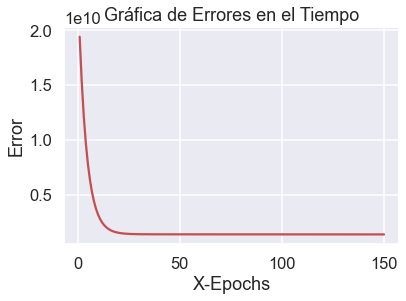

In [151]:
manual = modelo.epochs_loop()

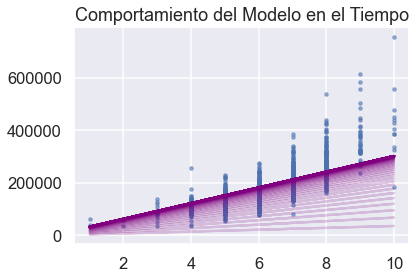

In [152]:
modelo.draw_models_in_time(1)



 B0: [-96469.57131874] 

 B1: [[45411.99877916]] 




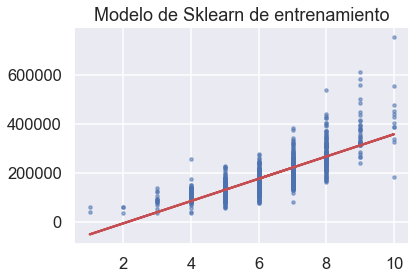

In [153]:
sklearn_ = modelo.regresion_sklearn()

In [154]:
res      = modelo.predict_models(manual, sklearn_,  np.zeros_like(np.arange(10), dtype=int).reshape(-1,1))
df       = pd.DataFrame({'Predicción Manual': res[0], 'Predicción Sklearn': res[1], 'Promedio': res[2]})
df.index += 1
df

,Predicción Manual,Predicción Sklearn,Promedio
1,212206.998296,221414.420135,216810.709216
2,182250.221625,176002.421356,179126.321490
3,212206.998296,221414.420135,216810.709216
4,212206.998296,221414.420135,216810.709216
5,242163.774968,266826.418915,254495.096941
6,152293.444953,130590.422577,141441.933765
7,242163.774968,266826.418915,254495.096941
8,212206.998296,221414.420135,216810.709216
9,212206.998296,221414.420135,216810.709216
10,152293.444953,130590.422577,141441.933765


3110994978.4522076 2625977511.083424


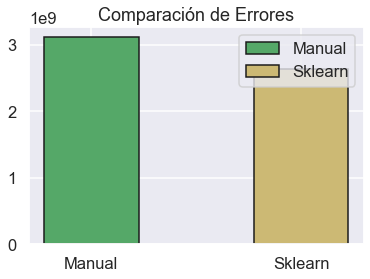

In [155]:
modelo.data_test(validation_test_set.loc[:, ['OverallQual']].to_numpy(),validation_test_set.loc[:, ['SalePrice']].to_numpy())

In [156]:
modelo2 = regresion_lineal(X2.to_numpy(), training_set.loc[:, ['SalePrice']].to_numpy(), 30, 5, 0.000001)

No.Iteración: 5, Error: 2013979262.253335
No.Iteración: 10, Error: 1968117942.58194
No.Iteración: 15, Error: 1968090124.0884812
No.Iteración: 20, Error: 1968090066.179731
No.Iteración: 25, Error: 1968090025.0851407
No.Iteración: 30, Error: 1968089984.0007732


 Betas: {1: array([[226.48314589],
       [  1.17943295]]), 2: array([[119.00042393],
       [  1.09813424]]), 3: array([[170.23500455],
       [  1.14112042]]), 4: array([[145.81263481],
       [  1.12486279]]), 5: array([[157.45422309],
       [  1.13684535]]), 6: array([[151.90493779],
       [  1.13536645]]), 7: array([[154.55015334],
       [  1.14030433]]), 8: array([[153.28923557],
       [  1.14218347]]), 9: array([[153.89028325],
       [  1.14552064]]), 10: array([[153.60377409],
       [  1.1481628 ]]), 11: array([[153.74034322],
       [  1.15113625]]), 12: array([[153.67524049],
       [  1.15395179]]), 13: array([[153.70627017],
       [  1.1568426 ]]), 14: array([[153.69147571],
       [  1.15969753]]), 15: array([

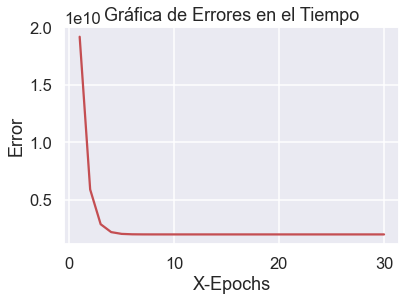

In [157]:
manual2 = modelo2.epochs_loop()

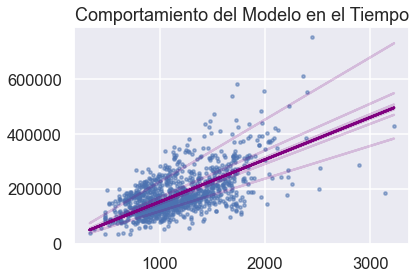

In [158]:
modelo2.draw_models_in_time(1)



 B0: [30324.58517496] 

 B1: [[129.95124229]] 




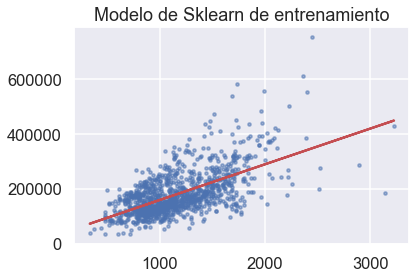

In [159]:
sklearn_2 = modelo2.regresion_sklearn()

In [160]:
res2      = modelo2.predict_models(manual2, sklearn_2,  np.zeros_like(np.arange(10), dtype=int).reshape(-1,1))
df2       = pd.DataFrame({'Predicción Manual': res2[0], 'Predicción Sklearn': res2[1], 'Promedio': res2[2]})
df2.index += 1
df2

,Predicción Manual,Predicción Sklearn,Promedio
1,131565.164535,141562.848573,136564.006554
2,193965.828677,194323.052941,194144.440809
3,141401.722429,149879.728079,145640.725254
4,147703.267330,155207.729013,151455.498172
5,175983.371276,179118.757594,177551.064435
6,122343.391509,133765.774036,128054.582772
7,260362.594463,250461.989609,255412.292036
8,170142.915027,174180.610387,172161.762707
9,157078.736573,163134.754792,160106.745683
10,165532.028514,170282.073118,167907.050816


4875814479.731019 4493912134.451242


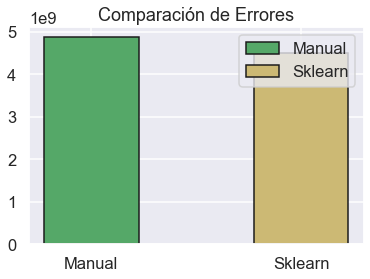

In [161]:
modelo2.data_test(validation_test_set.loc[:, ['1stFlrSF']].to_numpy(),validation_test_set.loc[:, ['SalePrice']].to_numpy())